[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 Loading dataset...
 Preprocessing text...
Vectorizing documents...
 Applying KMeans clustering...
 Visualizing clusters with t-SNE...


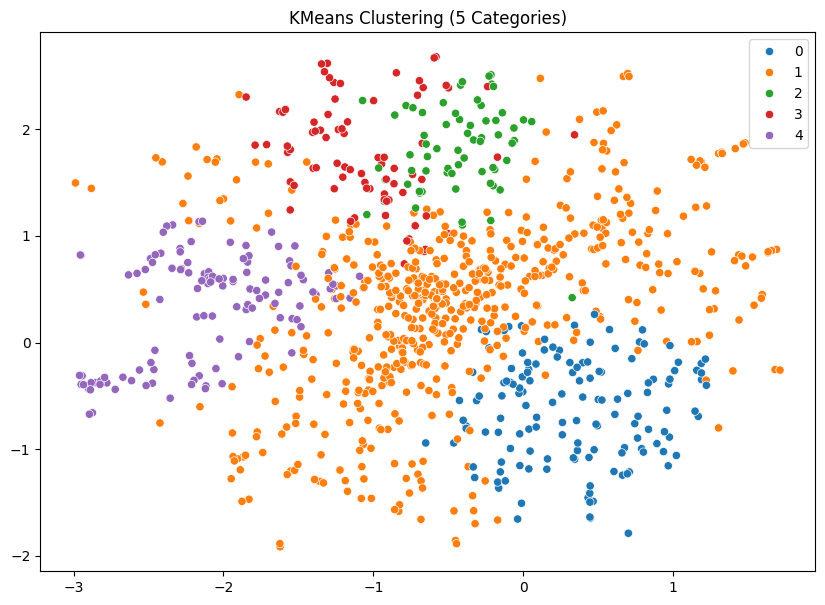

 Training LDA model...

 Top words per topic:

Topic #1:
state jewish arab israel government muslim people turkish jew armenian

Topic #2:
data software available format program jpeg graphic file edu image

Topic #3:
game right good say time people year think know like

Topic #4:
orbit year satellite launch mission earth nasa vitamin study space

Topic #5:
cancer medical lost new went 1993 woman child health said


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load dataset (5 categories)
print(" Loading dataset...")
categories = ['rec.sport.baseball', 'sci.space', 'talk.politics.mideast', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data

# 2. Preprocessing
print(" Preprocessing text...")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 2]
    return ' '.join(words)

docs_cleaned = [preprocess(doc) for doc in docs]

# 3. Vectorization
print("Vectorizing documents...")
tfidf = TfidfVectorizer(max_df=0.7, min_df=5, stop_words='english')
X_tfidf = tfidf.fit_transform(docs_cleaned)

count_vectorizer = CountVectorizer(max_df=0.7, min_df=5, stop_words='english')
X_count = count_vectorizer.fit_transform(docs_cleaned)

# 4. KMeans clustering
print(" Applying KMeans clustering...")
k = 5
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_tfidf)
clusters = km.labels_

# 5. t-SNE visualization (sample 1000 docs)
print(" Visualizing clusters with t-SNE...")
sample_size = 1000
tsne_model = TSNE(n_components=2, perplexity=40, random_state=0)
tsne_data = tsne_model.fit_transform(X_tfidf[:sample_size].toarray())

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=tsne_data[:, 0],
    y=tsne_data[:, 1],
    hue=clusters[:sample_size],  
    palette='tab10',
    legend='full'
)
plt.title('KMeans Clustering (5 Categories)')
plt.show()

# 6. LDA Topic Modeling
print(" Training LDA model...")
lda_model = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(X_count)

# 7. Show top words
print("\n Top words per topic:")
terms = count_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))
